In [1]:
import pandas as pd
import spacy
from glob import glob
import matplotlib.pyplot  as plt
import numpy as np

In [2]:
import os as os
os.chdir('D:\\ETH\\Robut')
os.getcwd()

'D:\\ETH\\Robut'

In [63]:
## Question 1
## Use model trained in problem set 1
## Create a list of values
## Use 500 documents because of the memory error

params = {'C':[.1,1,5,10], 'penalty':['l1','l2']}
from sklearn.model_selection import GridSearchCV
logit = LogisticRegression()
grid = GridSearchCV(logit,params,n_jobs=-1)
grid.fit(feature_pca2.iloc[:,1:1000],feature_pca2.loc[:,'reversed'])

C:\Users\Luyang\a1\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 5, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
grid.best_params_
logit_best = grid.best_estimator_

In [85]:
from sklearn.model_selection import cross_val_predict
predict_cv = cross_val_predict(logit_best,feature_pca2.iloc[:,1:500],feature_pca2.loc[:,'reversed'],method='decision_function')

C:\Users\Luyang\a1\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


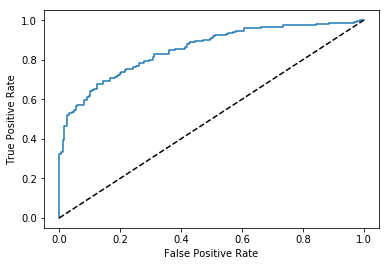

In [86]:
## ROC AUC curve of the best model
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(feature_pca2.loc[:,'reversed'], predict_cv)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [87]:
# ROC AUC score on the entire dataset 
from sklearn.metrics import roc_auc_score
print(roc_auc_score(feature_pca2.loc[:,'reversed'], predict_cv))

0.852698445311965


In [91]:
## Construct confusion matrix
from sklearn.metrics import confusion_matrix
predict_cv_label = cross_val_predict(logit_best,feature_pca2.iloc[:,1:500],feature_pca2.loc[:,'reversed'])
confusion_matrix(y, predict_cv_label)

C:\Users\Luyang\a1\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[152,  34],
       [ 92, 222]], dtype=int64)

C:\Users\Luyang\a1\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


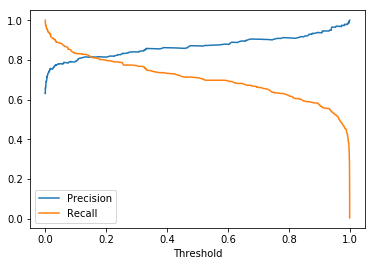

In [102]:
## Precision and Recall curve
from sklearn.metrics import precision_score, recall_score
predict_cv_prob = cross_val_predict(logit_best,feature_pca2.iloc[:,1:500],feature_pca2.loc[:,'reversed'],method='predict_proba')
from sklearn.metrics import precision_recall_curve
metrics = precision_recall_curve(y, 
                                 predict_cv_prob[:,1])
precisions, recalls, thresholds = metrics
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [114]:
## Calibration Curve
from sklearn import calibration

log_x, log_y= calibration.calibration_curve(y, predict_cv_prob[:,1], normalize=True, n_bins=10)

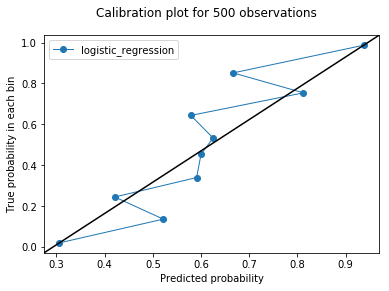

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(log_x, log_y, marker='o', linewidth=1, label='logistic_regression')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for 500 observations')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

In [158]:
## Question 2
random_1000 = np.random.choice(range(0,case_reversed.shape[0]),size=500)
y=case_reversed.iloc[random_1000,1]
filename2 = pd.Series(filename)[random_1000].values
token_norm2 = {}
docId2 = []
for fname in filename2:
    Id = fname.split("_")[-1][:-4] # get docId from filename
    docId2.append(Id)
    text = open(fname,encoding="utf8").read()
    doc = nlp(text)
    token_norm2[Id]= normalize_text(doc)
token_filter2={}
for key, value in token_norm2.items():
    token_tag_pair = tagger.tag(token_norm2[key])
    pair_trigram = ngrams(token_tag_pair,3)
    trigram_filter = []
    for i in list(pair_trigram):
        if i[2][1]=='NN':
            trigram_filter.append((i[0][0],i[1][0],i[2][0]))
    token_filter2[key]=trigram_filter
    
trigram_all2=[]
for key,value in token_filter2.items():
    for v in value:
        trigram_all2.append(v)

count_filter2=[key for (key,value) in Counter(trigram_all2).items() if (value > 5 and value <500)]

countByDoc2={}
for key, value in token_filter2.items():
    countByDoc2[key] = Counter(value)
    
df_feature2 = pd.DataFrame({'Id': docId2})
for trigram in count_filter2:
    freq = []
    for Id in docId2:
        freq.append(countByDoc2[Id][trigram]/sum(countByDoc2[Id].values()))
    df_name = '-'.join(trigram)
    df_feature2[df_name] = freq


In [ ]:
## Scale the frequencies 
sparse_scaler = StandardScaler(with_mean=False)
X_sparse = sparse_scaler.fit_transform(df_feature2.iloc[:,1:df_feature2.shape[1]])

In [256]:
## Load case_metadata; Remove NA values
case_meta = pd.read_csv('case_metadata.csv')
y_cites = case_meta.loc[case_meta['caseid'].isin(feature_pca2.iloc[:,0])].iloc[:,[0,4]]
y_cites = y_cites[np.isnan(y_cites.loc[:,'log_cites'])==False]
X_sparse = X_sparse.loc[X_sparse.iloc[:,0].isin(y_cites['caseid']),:]


In [265]:
X_sparse_join = X_sparse.set_index(0).join(y_cites.set_index('caseid'))

In [278]:
## Elastic Net model
from sklearn.linear_model import ElasticNetCV
enet_reg = ElasticNetCV(alphas=[.0001, .001, .01,.1], 
                        l1_ratio=[.001, .01,.1,.5,.9, 1])
enet_reg.fit(X_sparse_join.iloc[:,1:501],X_sparse_join['log_cites'])

C:\Users\Luyang\a1\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1], copy_X=True, cv='warn',
       eps=0.001, fit_intercept=True,
       l1_ratio=[0.001, 0.01, 0.1, 0.5, 0.9, 1], max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [281]:
## Prediction
elastic_pred = cross_val_predict(enet_reg,X_sparse_join.iloc[:,1:501],X_sparse_join['log_cites'])

C:\Users\Luyang\a1\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Luyang\a1\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default valu

Text(0, 0.5, 'True Value')

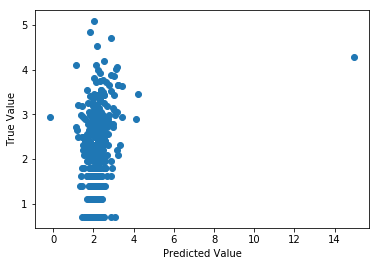

In [291]:
## Scatter Plot
plt.scatter(elastic_pred,X_sparse_join['log_cites'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [50]:
## Question 3
cites = np.exp(case_meta['log_cites'])
cites = np.nan_to_num(cites)
case_meta['cites'] = cites

In [51]:
cites_ave = pd.DataFrame({'judge_id':case_meta.groupby('judge_id').count().index, 'cites_average': case_meta.groupby('judge_id').mean()['cites'].values})
case_w_cites = case_meta.set_index('judge_id').join(cites_ave.set_index('judge_id'))

In [37]:
import linearmodels
from linearmodels.iv import IV2SLS

In [61]:
formula = 'case_reversed ~ 1 + year +  [cites ~ cites_average]'
mod = IV2SLS.from_formula(formula, case_w_cites)
res = mod.fit(cov_type='clustered')

C:\Users\Luyang\a1\lib\site-packages\linearmodels\utility.py:476: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [62]:
##  estiimation of cites: -0.006; Std:0.0011

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:          case_reversed   R-squared:                      0.0139
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0135
No. Observations:                4878   F-statistic:                    66.707
Date:                Fri, Apr 05 2019   P-value (F-stat)                0.0000
Time:                        14:14:37   Distribution:                  chi2(2)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -4.5131     0.6516    -6.9264     0.0000     -5.7902     -3.2360
year           0.0026     0.0003     7.9386     0.0000      0.0020      0.0033
cites         -0.0060     0.0011    -5.5013     0.0000     -0.0082     -0.0039
==============================================================================

Endogenous: cites
Instruments: cites_average
Clustered Covariance (One-Way)
Debiased: False
Num Clusters: 4878
IVResults, id: 0x25271c338d0

In [11]:
## Question 4
filename2 = pd.Series(filename)[random_1000].values
token_norm2 = {}
docId2 = []
for fname in filename2:
    Id = fname.split("_")[-1][:-4] # get docId from filename
    docId2.append(Id)
    text = open(fname,encoding="utf8").read()
    doc = nlp(text)
    token_norm2[Id]= normalize_text(doc)


In [34]:
import gensim
from gensim import corpora

In [40]:

dictionary = corpora.Dictionary(token_norm2.values())

In [42]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in token_norm2.values()]


In [50]:
from gensim.models.ldamodel import LdaModel
lda_10 = LdaModel(doc_term_matrix, num_topics=10, 
               id2word = dictionary, passes=3)
lda_10.show_topics(formatted=False)

[(0,
  [('#', 0.045882788),
   ('court', 0.014346284),
   ('state', 0.005677145),
   ('feder', 0.004994126),
   ('assist', 0.0049402216),
   ('requir', 0.0044764313),
   ('case', 0.004115716),
   ('may', 0.004097853),
   ('v', 0.0040738517),
   ('district', 0.004013915)]),
 (1,
  [('#', 0.06659947),
   ('court', 0.007809054),
   ('v', 0.0063469885),
   ('commiss', 0.0048652417),
   ('would', 0.004778275),
   ('oper', 0.0047281375),
   ('state', 0.0046586962),
   ('loss', 0.004266698),
   ('fund', 0.003986012),
   ('incom', 0.0038523574)]),
 (2,
  [('#', 0.10321617),
   ('state', 0.014360176),
   ('court', 0.012249073),
   ('v', 0.009109117),
   ('us', 0.0074764723),
   ('act', 0.0073561403),
   ('sct', 0.006575043),
   ('feder', 0.0060226833),
   ('section', 0.0054646544),
   ('law', 0.005218596)]),
 (3,
  [('#', 0.10264767),
   ('court', 0.014552476),
   ('state', 0.011684585),
   ('v', 0.011640117),
   ('us', 0.007949237),
   ('unit', 0.006920336),
   ('sct', 0.0068908604),
   ('case

In [52]:
lda_5 = LdaModel(doc_term_matrix, num_topics=5, 
               id2word = dictionary, passes=3)
lda_5.show_topics(formatted=False)

[(0,
  [('#', 0.09548622),
   ('state', 0.016305588),
   ('court', 0.014869113),
   ('v', 0.01028766),
   ('us', 0.008907563),
   ('sct', 0.0077152303),
   ('unit', 0.0063536325),
   ('case', 0.0053356183),
   ('act', 0.005307741),
   ('district', 0.0050934586)]),
 (1,
  [('#', 0.059114866),
   ('court', 0.008379862),
   ('state', 0.007760841),
   ('act', 0.0062166005),
   ('rule', 0.0056259204),
   ('commiss', 0.005527058),
   ('v', 0.0051069483),
   ('requir', 0.004897707),
   ('would', 0.004569044),
   ('case', 0.0040625846)]),
 (2,
  [('#', 0.1019892),
   ('court', 0.014942687),
   ('v', 0.010610973),
   ('state', 0.00973475),
   ('case', 0.005942977),
   ('sct', 0.0055594495),
   ('district', 0.005361214),
   ('us', 0.005104123),
   ('f2d', 0.004722359),
   ('section', 0.0046466882)]),
 (3,
  [('#', 0.080420665),
   ('court', 0.010975108),
   ('v', 0.00835633),
   ('state', 0.00814559),
   ('district', 0.0052965865),
   ('law', 0.005011191),
   ('us', 0.0049458193),
   ('case', 0.

In [60]:
lda_12 = LdaModel(doc_term_matrix, num_topics=12, 
               id2word = dictionary, passes=3)
lda_12.show_topics(formatted=False)

[(3,
  [('#', 0.081932254),
   ('state', 0.013662519),
   ('court', 0.012590804),
   ('v', 0.008957141),
   ('us', 0.0054101087),
   ('sct', 0.005321764),
   ('case', 0.0051961555),
   ('would', 0.0047788853),
   ('district', 0.0047776494),
   ('unit', 0.0046978868)]),
 (6,
  [('#', 0.113688976),
   ('court', 0.013575955),
   ('v', 0.012797915),
   ('state', 0.009652742),
   ('us', 0.008445194),
   ('sct', 0.006881887),
   ('unit', 0.006816061),
   ('f2d', 0.00639072),
   ('district', 0.006043602),
   ('case', 0.0050181956)]),
 (9,
  [('#', 0.071342535),
   ('court', 0.013928163),
   ('v', 0.0085021695),
   ('claim', 0.0069305478),
   ('state', 0.0065610963),
   ('district', 0.005881663),
   ('patent', 0.0056837415),
   ('defend', 0.0052602873),
   ('law', 0.0050174184),
   ('would', 0.004921677)]),
 (7,
  [('#', 0.044446982),
   ('court', 0.014845755),
   ('state', 0.013748106),
   ('claim', 0.007393418),
   ('plan', 0.00669834),
   ('use', 0.0059964904),
   ('feder', 0.0052676112),
 

In [49]:
import wordcloud

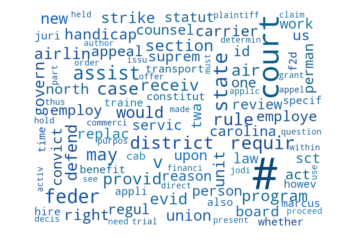

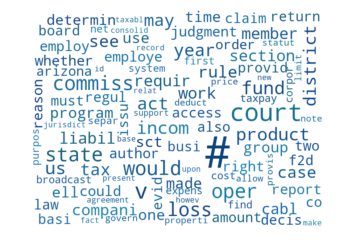

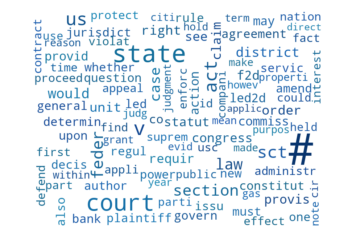

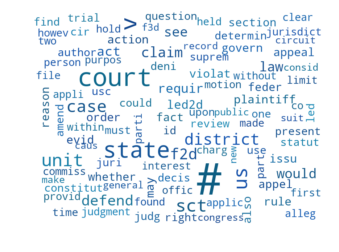

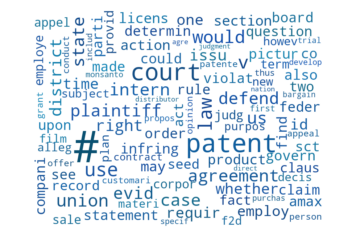

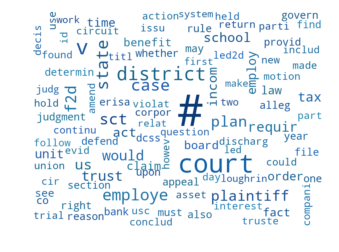

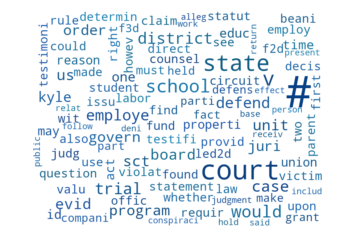

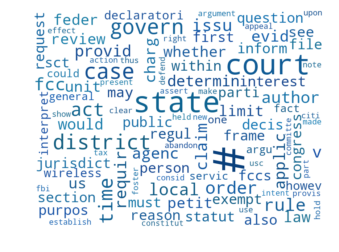

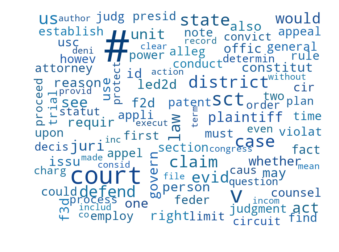

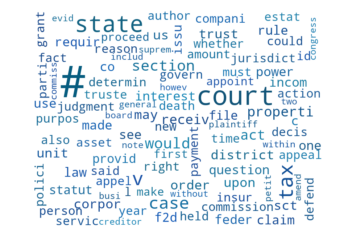

In [55]:
###
# LDA Word Clouds
###

from numpy.random import randint
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def colorfunc(word=None, font_size=None, 
                  position=None, orientation=None, 
                  font_path=None, random_state=None):   
        color = randint(maincol-10, maincol+10)
        if color < 0:
            color = 360 + color
        return "hsl(%d, %d%%, %d%%)" % (color,randint(65, 75)+font_size / 7, randint(35, 45)-font_size / 10)   

def plot_wordcloud (lda):
    
    for i,weights in lda.show_topics(num_topics=-1,
                                 num_words=100,
                                 formatted=False):
    
    #logweights = [w[0], np.log(w[1]) for w in weights]
        maincol = randint(0,360)
    

    
        wordcloud = WordCloud(background_color="white", 
                          ranks_only=False, 
                          max_font_size=120,
                          color_func=colorfunc,
                          height=600,width=800).generate_from_frequencies(dict(weights))

        plt.clf()
        plt.imshow(wordcloud,interpolation="bilinear")
        plt.axis("off")
        plt.show()

plot_wordcloud(lda_10)
# make word clouds for the topics


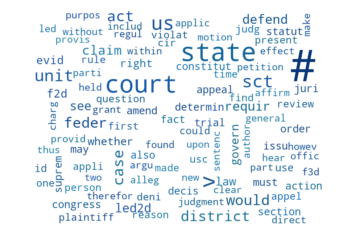

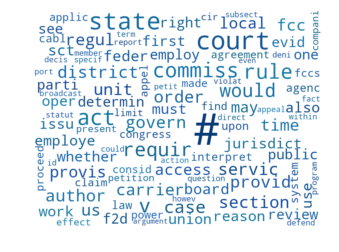

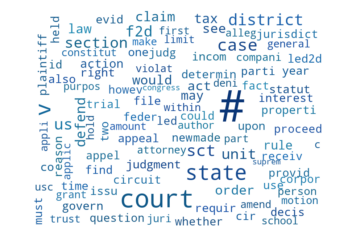

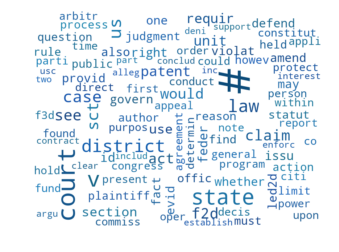

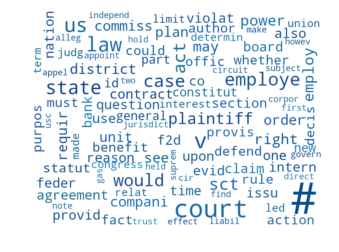

In [56]:
plot_wordcloud(lda_5)

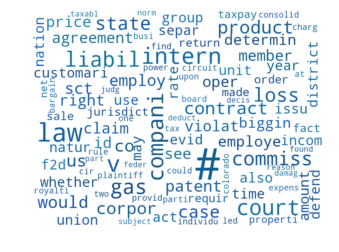

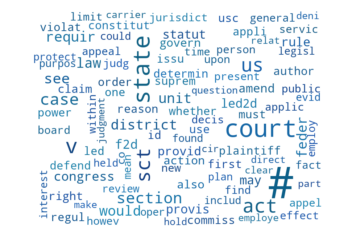

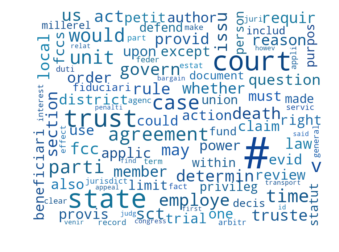

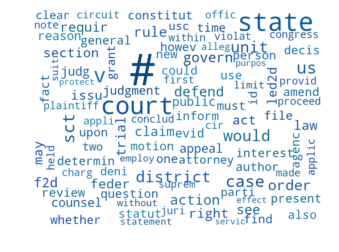

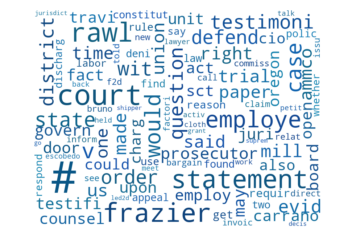

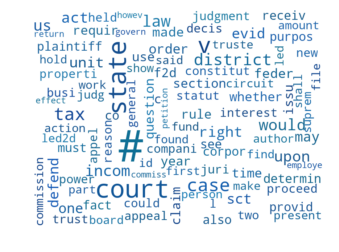

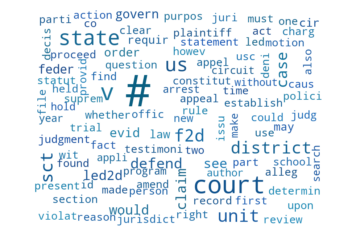

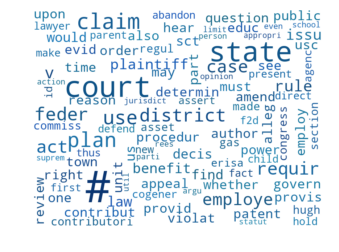

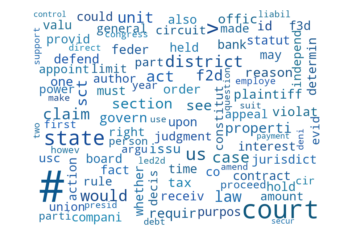

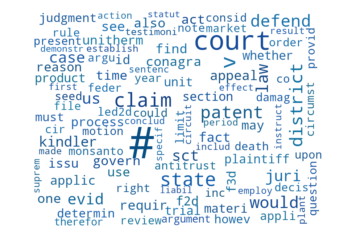

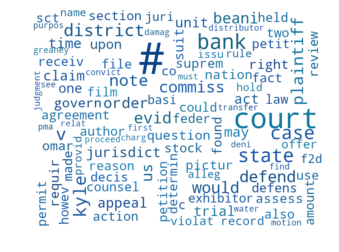

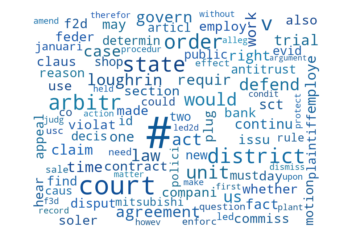

In [61]:
plot_wordcloud(lda_12)

As the topics generated by 5 clusters are too general and the topics generated by 12 clusters overlap, 10 clusters are chosen.

In [22]:
## Question 5
feature= pd.read_csv('feature').iloc[:,2:502]

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.utils import np_utils

In [66]:
input_dim = 500
output_dim = 2
reverse = pd.read_csv('feature').iloc[:,502]
y = np_utils.to_categorical(reverse, 2) 
x=feature.values.reshape(500*500)

In [71]:
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=feature.shape[1]))
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.fit(feature, y, epochs=10, validation_split = 0.2)

C:\Users\Luyang\a1\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 400 samples, validate on 100 samples
Epoch 1/10
400/400 [==============================] - ETA: 0s - loss: 1.000 - ETA: 0s - loss: 1.115 - ETA: 0s - loss: 1.092 - ETA: 0s - loss: 1.129 - ETA: 0s - loss: 1.214 - ETA: 0s - loss: 1.218 - ETA: 0s - loss: 1.250 - ETA: 0s - loss: 1.300 - ETA: 0s - loss: 1.307 - ETA: 0s - loss: 1.303 - ETA: 0s - loss: 1.292 - ETA: 0s - loss: 1.313 - 1s 3ms/step - loss: 1.3182 - val_loss: 1.1431
Epoch 2/10
400/400 [==============================] - ETA: 0s - loss: 0.995 - ETA: 1s - loss: 1.239 - ETA: 0s - loss: 1.141 - ETA: 0s - loss: 1.092 - ETA: 0s - loss: 1.103 - ETA: 0s - loss: 1.168 - ETA: 0s - loss: 1.153 - ETA: 0s - loss: 1.159 - ETA: 0s - loss: 1.158 - ETA: 0s - loss: 1.188 - ETA: 0s - loss: 1.176 - ETA: 0s - loss: 1.175 - 1s 3ms/step - loss: 1.1639 - val_loss: 1.1358
Epoch 3/10
400/400 [==============================] - ETA: 1s - loss: 1.150 - ETA: 1s - loss: 1.179 - ETA: 1s - loss: 1.149 - ETA: 1s - loss: 1.063 - ETA: 0s - loss: 1.033 - ETA:

In [72]:
score = model.evaluate(feature, y, verbose=0) 

In [73]:
score

0.6223748474121094

The result is roughly the same as directly fitting the logsitic regression 

In [90]:
## Add two additional layers, Batch normalization and Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1 = Sequential()
model1.add(Dense(32, input_dim=500, activation='sigmoid'))
model1.add(Dense(32, activation="sigmoid"))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(2,activation='sigmoid'))


In [91]:
model1.compile(optimizer='rmsprop', loss='binary_crossentropy')
model1.fit(feature, y, epochs=5, validation_split = 0.2)

Train on 400 samples, validate on 100 samples
Epoch 1/5
400/400 [==============================] - ETA: 22s - loss: 1.12 - ETA: 19s - loss: 1.09 - ETA: 18s - loss: 1.02 - ETA: 15s - loss: 0.93 - ETA: 13s - loss: 0.89 - ETA: 11s - loss: 0.88 - ETA: 9s - loss: 0.8888 - ETA: 8s - loss: 0.901 - ETA: 6s - loss: 0.886 - ETA: 4s - loss: 0.883 - ETA: 2s - loss: 0.885 - ETA: 0s - loss: 0.875 - 25s 62ms/step - loss: 0.8718 - val_loss: 0.6654
Epoch 2/5
400/400 [==============================] - ETA: 21s - loss: 0.81 - ETA: 19s - loss: 0.74 - ETA: 17s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 13s - loss: 0.66 - ETA: 12s - loss: 0.68 - ETA: 10s - loss: 0.69 - ETA: 8s - loss: 0.6846 - ETA: 6s - loss: 0.674 - ETA: 4s - loss: 0.668 - ETA: 2s - loss: 0.670 - ETA: 0s - loss: 0.659 - 25s 63ms/step - loss: 0.6555 - val_loss: 0.6606
Epoch 3/5
400/400 [==============================] - ETA: 21s - loss: 0.51 - ETA: 19s - loss: 0.53 - ETA: 17s - loss: 0.55 - ETA: 16s - loss: 0.57 - ETA: 14s - loss: 0.57 - E

In [92]:
model1.evaluate(feature, y, verbose=0) 

0.5707133145332336

The performance is not better than logistic regression.